# Pumpkin Seed Assignment - Group 6

Team members:
 - Phuong Le
 - Hiep Huynh
 - Xin Feng

## Information about the dataset

The dataset:
- Features: 13 features
- Target:  2 pumpkin class: Çerçevelik, Ürgüp Sivrisi
  
Pumpkin seeds dataset https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset/data

In [24]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

In [25]:
# load the dataset
seed = pd.read_excel('./data/Pumpkin_Seeds_Dataset.xlsx')
seed.head()

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness       Class  
0       0.8207  Çerçevelik  
1       0.7487  Çerçevelik  
2       0.6929  Çerçevelik  
3       0.7624  Çerçevelik  
4       0.7557  Çerçevelik

In [26]:
# check the data information
seed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [27]:
# check if there is any null value
seed.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [28]:
seed.iloc[:,-1]

0          Çerçevelik
1          Çerçevelik
2          Çerçevelik
3          Çerçevelik
4          Çerçevelik
            ...      
2495    Ürgüp Sivrisi
2496    Ürgüp Sivrisi
2497    Ürgüp Sivrisi
2498    Ürgüp Sivrisi
2499    Ürgüp Sivrisi
Name: Class, Length: 2500, dtype: object

In [29]:
#check out the column names
seed.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

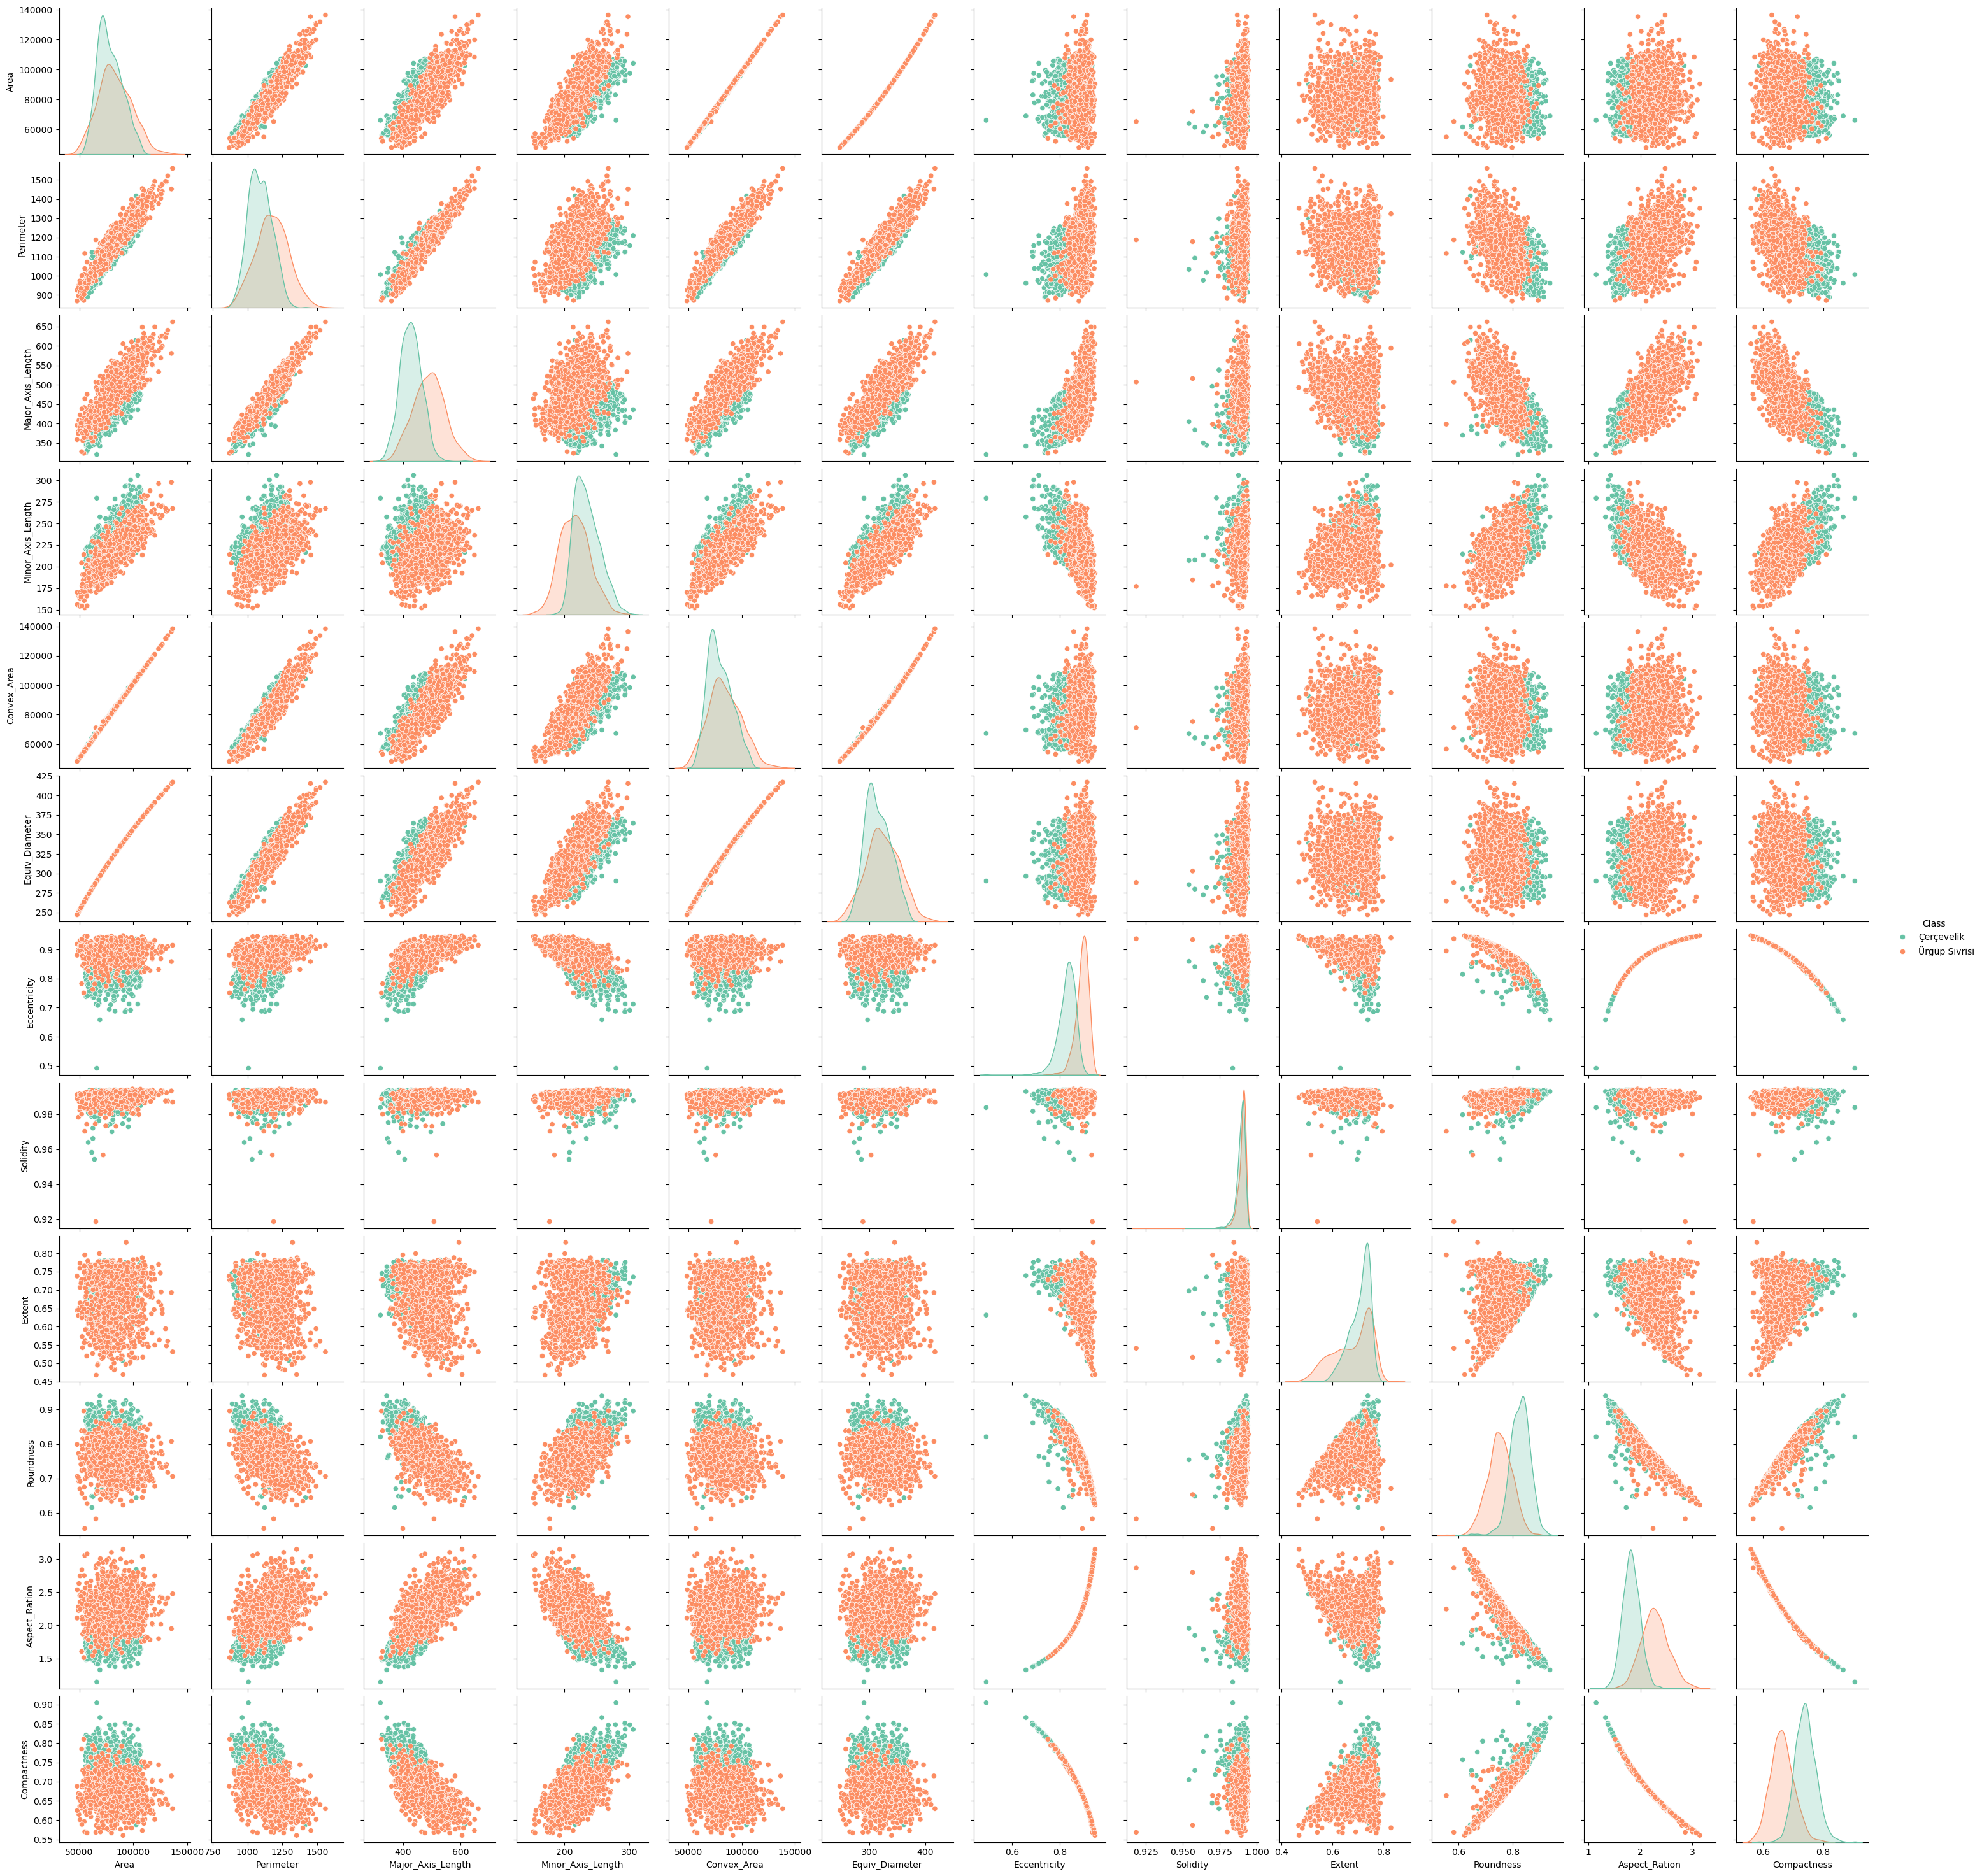

In [30]:
# Visualize all features and target
sns.pairplot(seed, hue='Class', diag_kind='kde', palette='Set2')
plt.show()

## The label variable

In [31]:
# Check unique values in the class column
seed['Class'].unique()

array(['Çerçevelik', 'Ürgüp Sivrisi'], dtype=object)

In [32]:
# Area, Perimeter, Major_Axis_Length, Minor_Axis_Length, Convex_Area, Equiv_Diameter, Eccentricity,
# Solidity, Extent, Roundness, Aspect_Ration, Compactness, Class
# Encoding the class column using get_dummies, use drop_first to merge the column to one instead of having two
seed = pd.get_dummies(seed,drop_first = True)
#Rename the column name
seed.rename(columns = {'Class_Ürgüp Sivrisi': 'Class'}, inplace = True)
seed.head()

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness  Class  
0       0.8207  False  
1       0.7487  False  
2       0.6929  False  
3       0.7624  False  
4       0.7557  False

In [33]:
# Split the data into features and target variable
X = seed.drop('Class',axis=1)
y = seed['Class']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [34]:
print("Raw X_train variance:", X_train.var())
print("Scaled X_train variance:", StandardScaler().fit_transform(X_train).var())

Raw X_train variance: Area                 1.851355e+08
Perimeter            1.207121e+04
Major_Axis_Length    3.203800e+03
Minor_Axis_Length    5.366460e+02
Convex_Area          1.879798e+08
Equiv_Diameter       7.219711e+02
Eccentricity         2.047937e-03
Solidity             1.253884e-05
Extent               3.626060e-03
Roundness            3.159937e-03
Aspect_Ration        1.008249e-01
Compactness          2.863930e-03
dtype: float64
Scaled X_train variance: 1.0


## PCA

In [35]:
# Prepare a svm classifier
svm = SVC(random_state=42)

### Without PCA, and Scaler

In [36]:
svm.fit(X_train, y_train)
y_pred = svm.predict(X_valid)
print("SVM accuracy on validation set:", accuracy_score(y_valid, y_pred))

SVM accuracy on validation set: 0.566


### Without Scaler

In [37]:
# Create a pipeline with SVM and PCA
pipeline = Pipeline([
    ('pca', PCA(n_components=2)),
    ('svm', svm)
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
print("SVM with PCA accuracy on validation set:", accuracy_score(y_valid, y_pred))


SVM with PCA accuracy on validation set: 0.594


### With Scaler

In [38]:
# Create a pipeline with SVM, PCA, and StandardScaler
# But in different order
pipeline = Pipeline([
    ('pca', PCA(n_components=2)),
    ('scaler', StandardScaler()),
    ('svm', svm)
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
print("SVM with PCA accuracy on validation set:", accuracy_score(y_valid, y_pred))

SVM with PCA accuracy on validation set: 0.636


In [39]:
# Create a pipeline with SVM, PCA, and StandardScaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('svm', svm)
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
print("SVM with PCA accuracy on validation set:", accuracy_score(y_valid, y_pred))

SVM with PCA accuracy on validation set: 0.836


In [40]:
# Try different n_components for PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svm', svm)
])

grid_params = {
    'pca__n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10],
}

grid_search = GridSearchCV(pipeline, grid_params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'pca__n_components': 4}
Best cross-validation score: 0.8860000000000001


## Kernel SVM

### Basic Kernel SVM

In [41]:
# Kernel PCA and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kpca', KernelPCA()),
    ('svm', svm)
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
print("SVM with Kernel PCA accuracy on validation set:", accuracy_score(y_valid, y_pred))

SVM with Kernel PCA accuracy on validation set: 0.876


In [42]:
# Try different hyperparameters for Kernel PCA
grid_params = {
    'kpca__n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'kpca__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}
grid_search = GridSearchCV(pipeline, grid_params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters for Kernel PCA:", grid_search.best_params_)
print("Best cross-validation score for Kernel PCA:", grid_search.best_score_)

Best parameters for Kernel PCA: {'kpca__kernel': 'linear', 'kpca__n_components': 4}
Best cross-validation score for Kernel PCA: 0.8860000000000001


## Try different classifiers

### SVM

In [43]:
# Build a pipeline: Scaling → PCA → SVM
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('kpca', KernelPCA()),
    ('svc', SVC())
])

In [44]:
 # Define parameters for GridSearchCV
svm_param_grid = {
    'kpca__n_components': [2, 4, 6, 8, 10],
    'kpca__kernel': ['linear', 'rbf', 'sigmoid'],
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto'],
    'svc__degree': [2, 3, 4],
    'svc__kernel': ['linear', 'poly', 'rbf']
    }

Best accuracy score: 0.8893333333333333
Best parameters: {'kpca__kernel': 'sigmoid', 'kpca__n_components': 8, 'svc__C': 1, 'svc__degree': 2, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}
SVM with Kernel PCA accuracy on validation set: 0.866


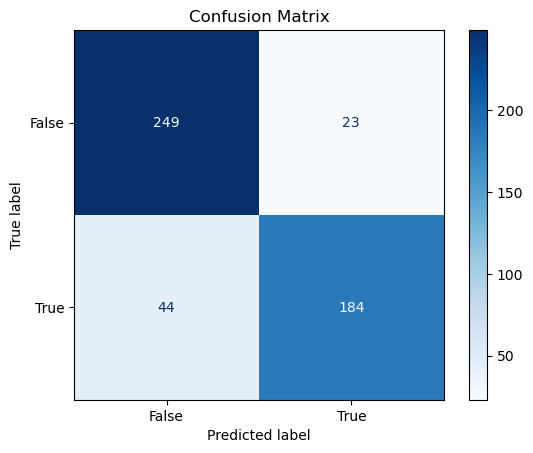

In [45]:
#  Grid Search with cross-validation
grid = GridSearchCV(svm_pipe, svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
# Show results
print("Best accuracy score:", grid.best_score_)
print("Best parameters:", grid.best_params_)
# Print the confusion matrix
y_pred = grid.predict(X_valid)
print("SVM with Kernel PCA accuracy on validation set:", accuracy_score(y_valid, y_pred))
# Print confusion matrix
cm = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### Random Forest

Best accuracy score 0.8933333333333333
Best parameters: {'kpca__kernel': 'linear', 'kpca__n_components': 10, 'rf__max_depth': 10, 'rf__n_estimators': 200}
Random Forest with Kernel PCA accuracy on validation set: 0.866


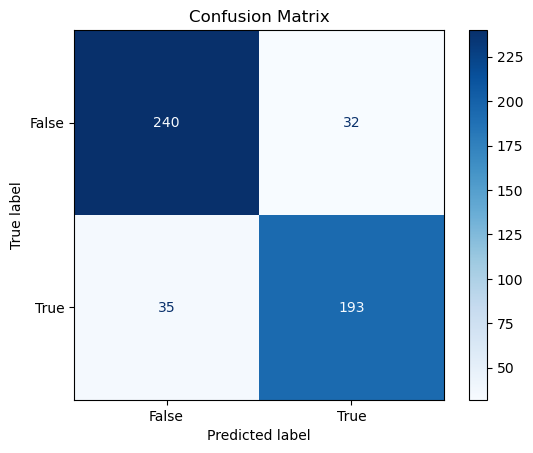

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('kpca', KernelPCA()),
    ('rf', RandomForestClassifier(random_state=42))
])

rf_param_grid = {
    'kpca__n_components': [2, 4, 6, 8, 10],
    'kpca__kernel': ['linear', 'rbf', 'sigmoid'],
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 5, 10]
}

rf_grid = GridSearchCV(rf_pipe, rf_param_grid, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
# Show results
# Best score and parameters
print("Best accuracy score",rf_grid.best_score_)
print("Best parameters:", rf_grid.best_params_)
# Print the confusion matrix
y_pred = rf_grid.predict(X_valid)
print("Random Forest with Kernel PCA accuracy on validation set:", accuracy_score(y_valid, y_pred))
# Print confusion matrix
cm = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_grid.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


### Try Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('kpca', KernelPCA()),
    ('lr', LogisticRegression(random_state=42, max_iter=8000))
])

In [49]:
lr_param_grid = {
    'kpca__n_components': [2, 4, 6, 8, 10],
    'kpca__kernel': ['linear', 'rbf', 'sigmoid'],
    'lr__C': [0.1, 1, 10],
}

Best accuracy score 0.8846666666666667
Best parameters: {'kpca__kernel': 'sigmoid', 'kpca__n_components': 8, 'lr__C': 10}
Logistic Regression with Kernel PCA accuracy on validation set: 0.868


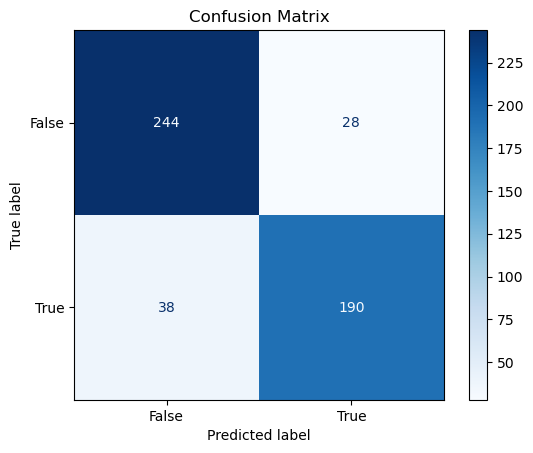

In [50]:
lr_grid = GridSearchCV(lr_pipe, lr_param_grid, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)
# Show results
print("Best accuracy score",lr_grid.best_score_)
print("Best parameters:", lr_grid.best_params_)
# Print the confusion matrix
y_pred = lr_grid.predict(X_valid)
print("Logistic Regression with Kernel PCA accuracy on validation set:", accuracy_score(y_valid, y_pred))
# Print confusion matrix
cm = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_grid.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


## Conclusion

As the data shown, we can see:



The accuracy is the same for 3 models. The accuracy rate from three models were very similar.

Random forest brings the best result because the wrong predictions of the `true class` are less than the other two models.
In certain scenarios, it is very important.

### Train on Test Dataset

Best model test accuracy: 0.894
              precision    recall  f1-score   support

       False       0.89      0.90      0.89       250
        True       0.90      0.89      0.89       250

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



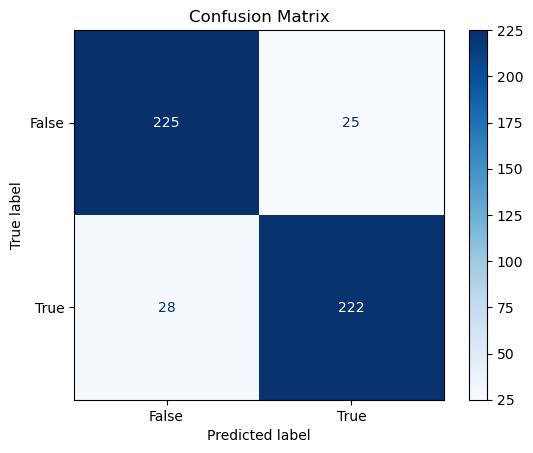

In [51]:
best_model = Pipeline([
    ('scaler', StandardScaler()),
    ('kpca', KernelPCA(kernel='linear', n_components=10)),
    ('rf', RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10))
])
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Best model test accuracy:", accuracy_score(y_test, y_pred))
# Classification report
print(classification_report(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()